# <strong>Titanic - Machine Learning Survivor Prediction</strong> Using Ensembles

Erickson Figueroa <br>
Data Science, Machine Learning & AI<img src="./the titanic sinking.jpeg" withd = 500 height = "300">

## 1. <b>Importing Libraries</b>

In [32]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
# Importing the ensembles
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

# Data preprocessing
from sklearn.preprocessing import LabelEncoder

# Model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Evaluate execution time
import time

# check scikit-learn version
from sklearn import __version__ as ver
print(f"scikit-learn version: {ver}")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

scikit-learn version: 1.5.0


## 2. <b>Importing the data</b>
Let's convert the train.csv into a pandas dataframe

In [54]:
train  = pd.read_csv('train.csv')

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. <b>Exploratory Data Analysis (EDA)</b>

### Checking missing values:

In [57]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: >

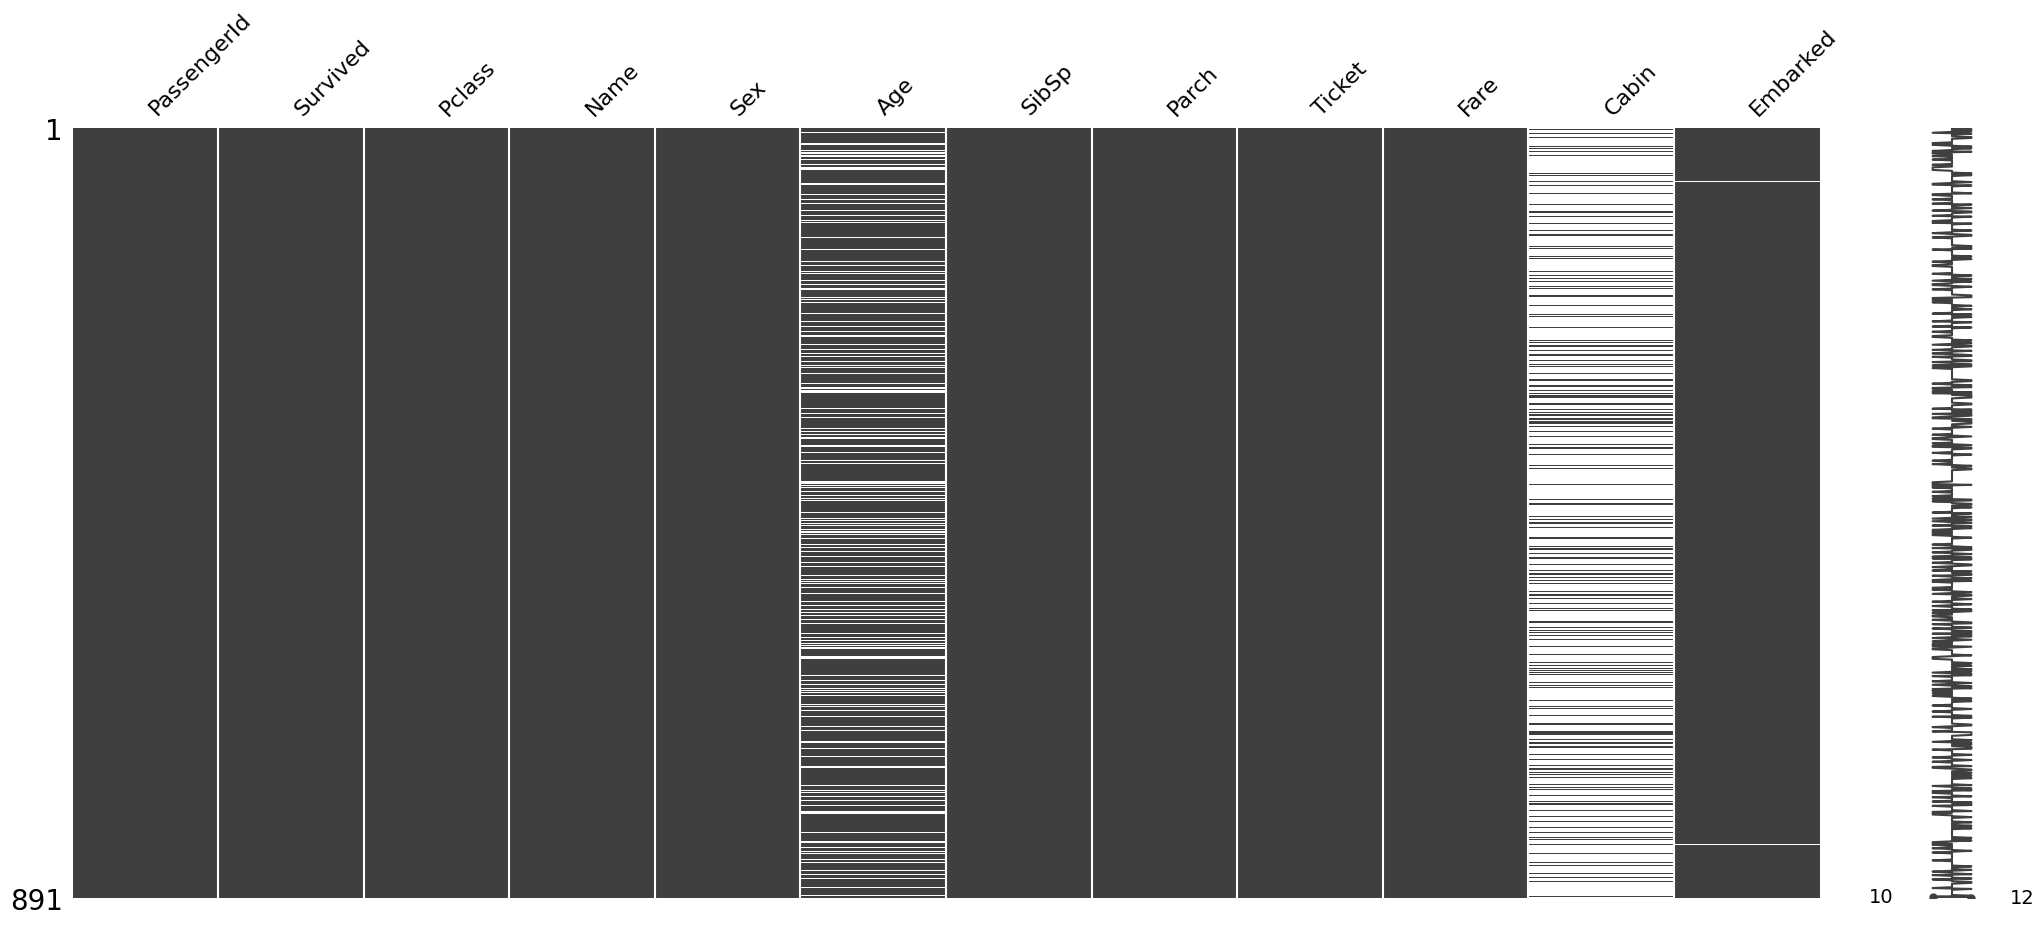

In [60]:
# Plotting where missing values come from
missingno.matrix(train)

### How many survived and how many did not:

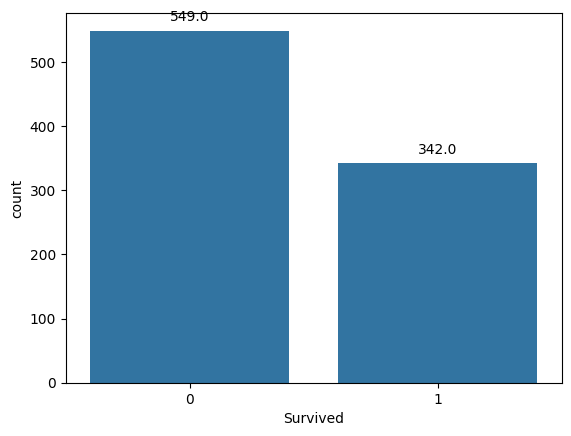

In [61]:
def plotting_distributions_v1(data_param, x_param):
    # Create countplot
    ax = sns.countplot(data=data_param, x=x_param)
    
    # Adding the annotations
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
    
    plt.show()
    
    # Checking suvivors
plotting_distributions_v1(data_param=train, x_param='Survived')

## 4. <b>Data Cleaning</b>

### Impute Missing Values

It's time to fix the missing values of the ages. I'm going to use inputation instead of dropping those rows.

In [62]:
# handling missing values
train["Age"].fillna(train["Age"].median(), inplace=True)
train["Fare"].fillna(train["Fare"].median(), inplace=True)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)

### Remove Irrelevant Columns

In [63]:
# drop unnecessary columns
train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Feature Encoding
Conver categorical features to numerical.

In [64]:
le = LabelEncoder()
train["Sex"] = le.fit_transform(train["Sex"])
train["Embarked"] = le.fit_transform(train["Embarked"])

### Basic statistics

In [65]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### Detect and remove outliers in numerical variables

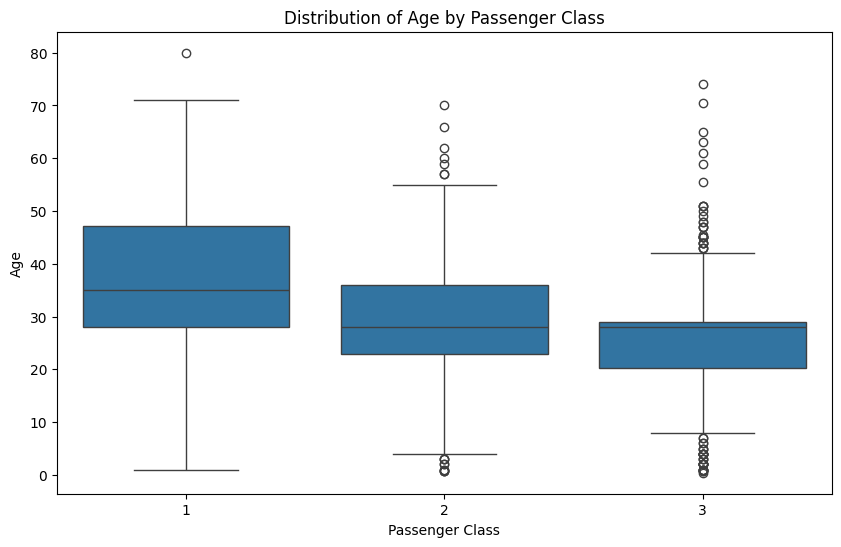

In [66]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Pclass', y='Age')
plt.title('Distribution of Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

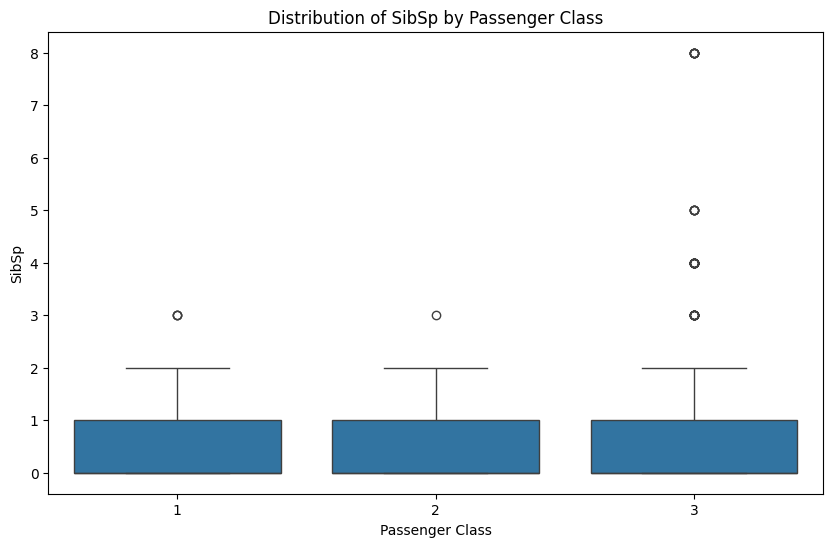

In [67]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Pclass', y='SibSp')
plt.title('Distribution of SibSp by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('SibSp')
plt.show()

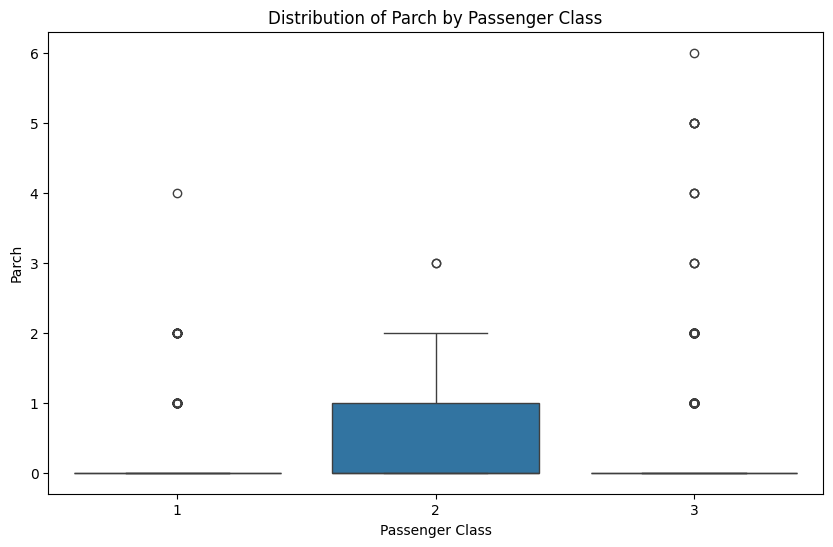

In [68]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Pclass', y='Parch')
plt.title('Distribution of Parch by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Parch')
plt.show()

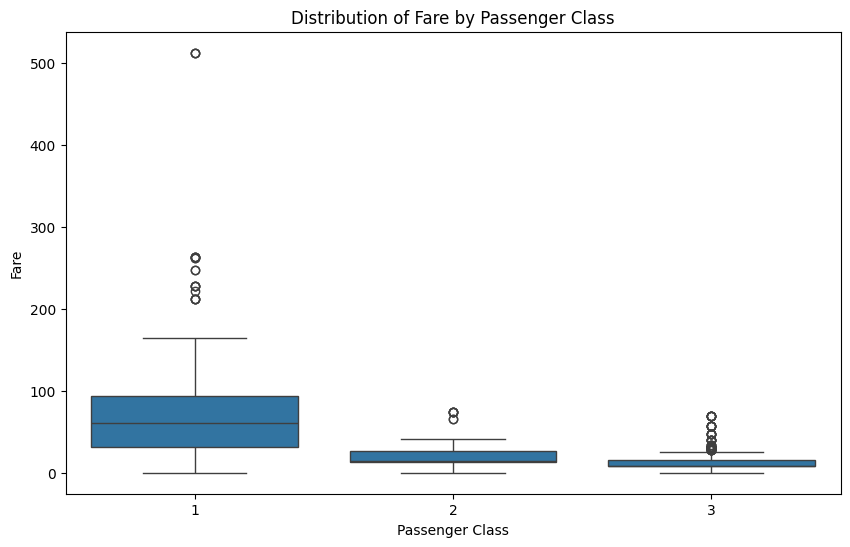

In [69]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Pclass', y='Fare')
plt.title('Distribution of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

In [70]:
# Function to detect outliers
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 25 indices:  [7, 16, 119, 164, 268, 297, 305, 386, 438, 587, 642, 659, 745, 824, 879, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [71]:
# Outliers in numerical variables
train.loc[outliers_to_drop, :]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,1,2.00,3,1,21.0750,2
16,0,3,1,2.00,4,1,29.1250,1
119,0,3,0,2.00,4,2,31.2750,2
164,0,3,1,1.00,4,1,39.6875,2
268,1,1,0,58.00,0,1,153.4625,2
297,0,1,0,2.00,1,2,151.5500,2
305,1,1,1,0.92,1,2,151.5500,2
386,0,3,1,1.00,5,2,46.9000,2
438,0,1,1,64.00,1,4,263.0000,2
587,1,1,1,60.00,1,1,79.2000,0


In [72]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 866 rows


### Examine Feature Correlations

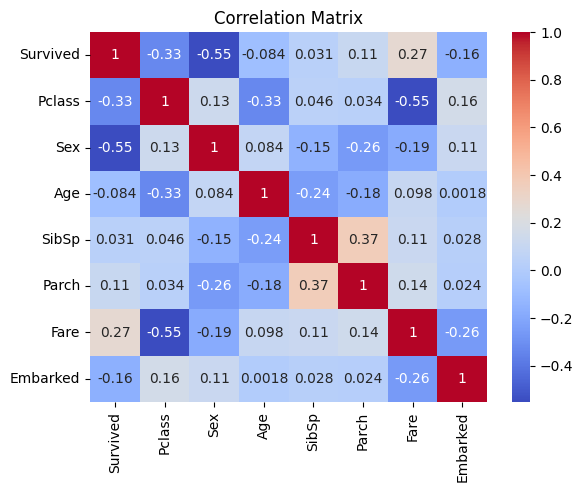

In [73]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 5. <b>Modelling</b>

- Decision Tree Classifier
- Random Forest
- Adaboost
- Gradient Boosting

### Split train and test

In [74]:
# Separate features and target variable
random_state = 42
X = train.drop('Survived', axis=1)
y = train['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

### Models training and prediction

Training Decision Tree...
Train accuracy: 0.984
Test accuracy: 0.764
Training time: 0.004 seconds
Decision Tree Depth: 24

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        99
           1       0.77      0.64      0.70        75

    accuracy                           0.76       174
   macro avg       0.77      0.75      0.75       174
weighted avg       0.77      0.76      0.76       174


Confusion Matrix for Decision Tree:

                     Predicted Not Survived  Predicted Survived
Actual Not Survived                      85                  14
Actual Survived                          27                  48


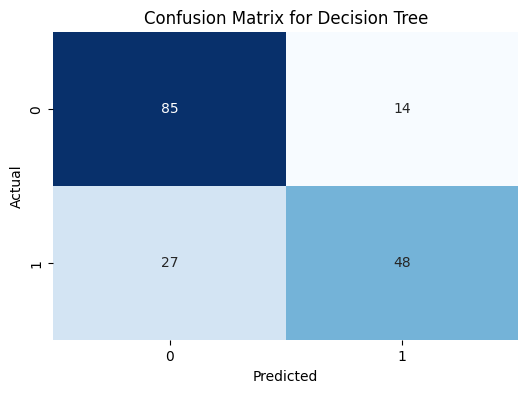

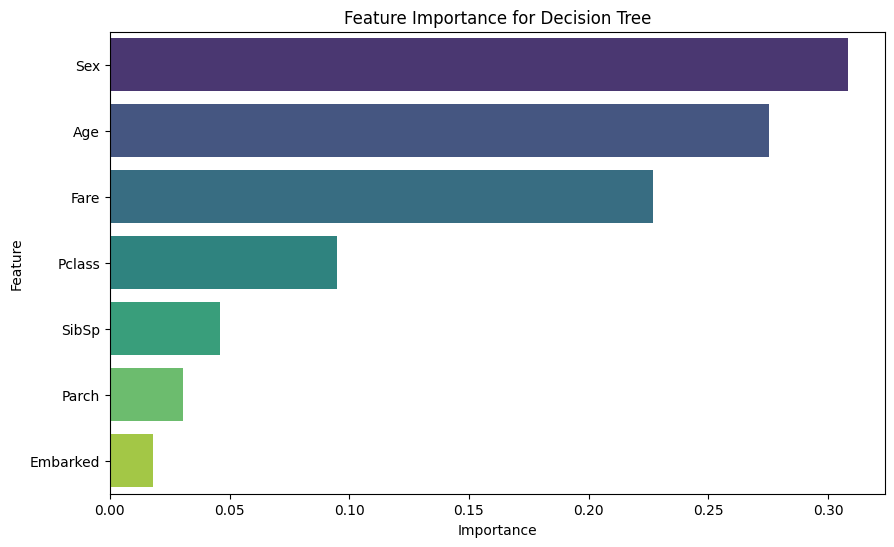


------------------------------------------------------

Training Random Forest...
Train accuracy: 0.984
Test accuracy: 0.770
Training time: 0.095 seconds

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        99
           1       0.78      0.65      0.71        75

    accuracy                           0.77       174
   macro avg       0.77      0.76      0.76       174
weighted avg       0.77      0.77      0.77       174


Confusion Matrix for Random Forest:

                     Predicted Not Survived  Predicted Survived
Actual Not Survived                      85                  14
Actual Survived                          26                  49


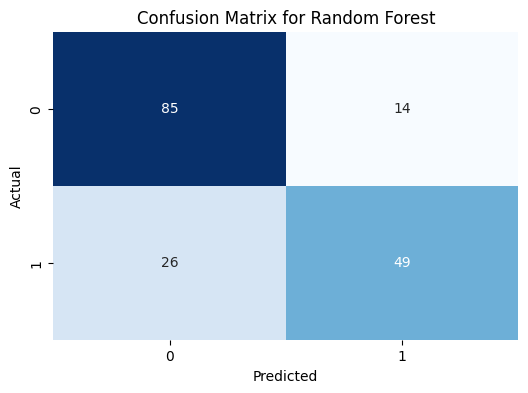

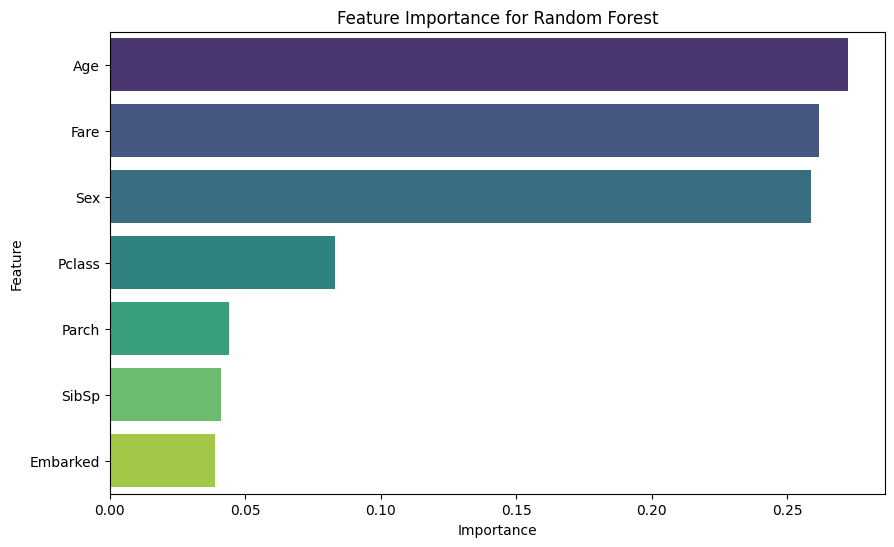


------------------------------------------------------

Training AdaBoost...
Train accuracy: 0.850
Test accuracy: 0.799
Training time: 0.054 seconds

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.79      0.72      0.76        75

    accuracy                           0.80       174
   macro avg       0.80      0.79      0.79       174
weighted avg       0.80      0.80      0.80       174


Confusion Matrix for AdaBoost:

                     Predicted Not Survived  Predicted Survived
Actual Not Survived                      85                  14
Actual Survived                          21                  54


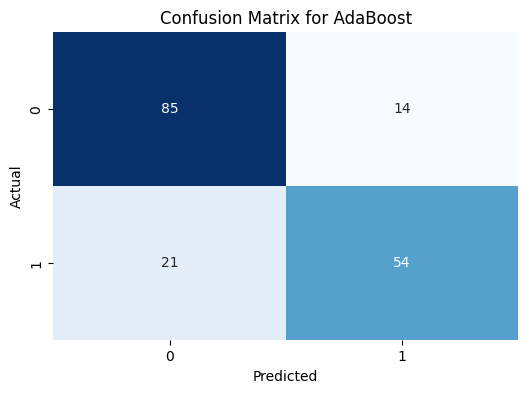

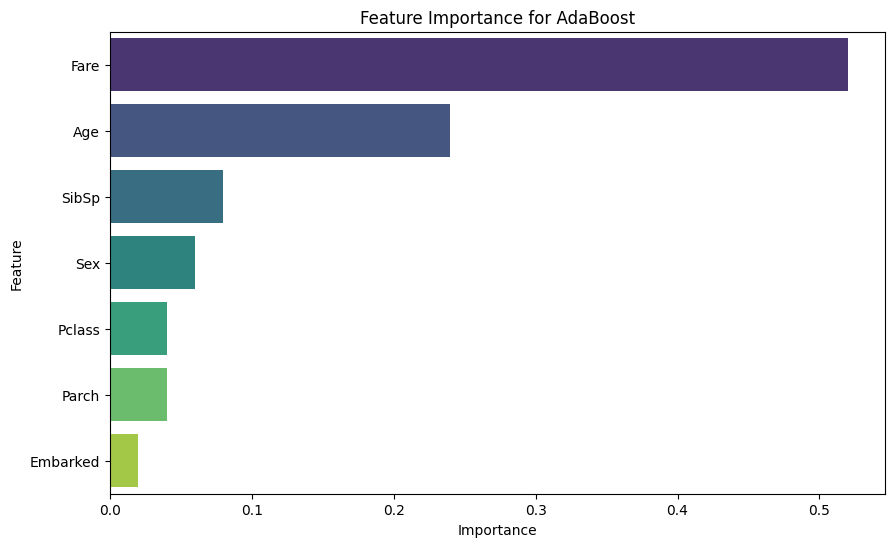


------------------------------------------------------

Training Gradient Boosting...
Train accuracy: 0.906
Test accuracy: 0.793
Training time: 0.084 seconds

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        99
           1       0.84      0.64      0.73        75

    accuracy                           0.79       174
   macro avg       0.81      0.77      0.78       174
weighted avg       0.80      0.79      0.79       174


Confusion Matrix for Gradient Boosting:

                     Predicted Not Survived  Predicted Survived
Actual Not Survived                      90                   9
Actual Survived                          27                  48


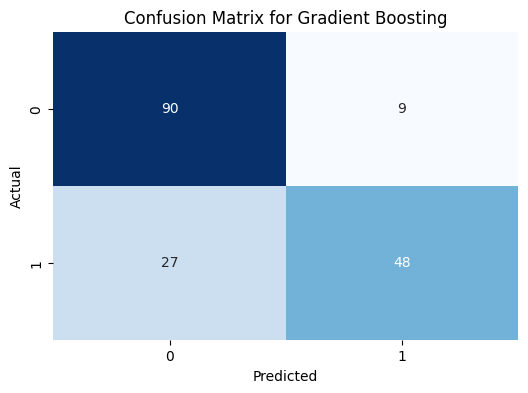

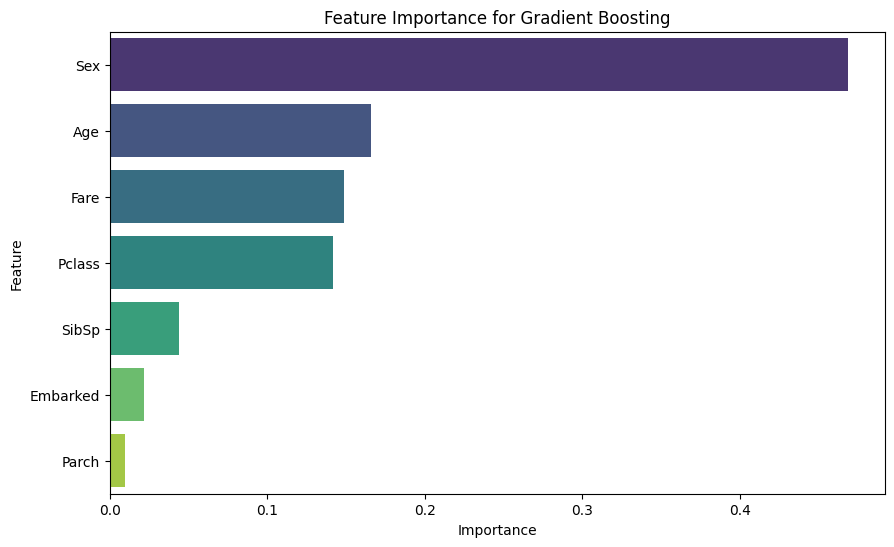


------------------------------------------------------



In [91]:
# Initialize the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=101),
    'Random Forest': RandomForestClassifier(random_state=101),
    'AdaBoost': AdaBoostClassifier(random_state=101),
    'Gradient Boosting': GradientBoostingClassifier(random_state=101)
}

# Train the models and print results
for model_name, clf in models.items():
    print(f"Training {model_name}...")
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print(f"Train accuracy: {train_accuracy:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    print(f"Training time: {train_time:.3f} seconds")
    
    if isinstance(clf, DecisionTreeClassifier):
        depth = clf.get_depth()
        print(f"Decision Tree Depth: {depth}")
    
    # Classification report
    y_pred = clf.predict(X_test)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Confusion Matrix as a table
    cm_df = pd.DataFrame(cm, index=['Actual Not Survived', 'Actual Survived'], columns=['Predicted Not Survived', 'Predicted Survived'])
    print(f"\nConfusion Matrix for {model_name}:\n")
    print(cm_df)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Feature Importance
    if isinstance(clf, DecisionTreeClassifier) or isinstance(clf, RandomForestClassifier) or isinstance(clf, GradientBoostingClassifier) or isinstance(clf, AdaBoostClassifier):
        feature_importance = clf.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
        importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
        plt.title(f'Feature Importance for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    
    print("\n------------------------------------------------------\n")

## New sample data point and make predictions 

In [103]:
# Sample new data point
# Example: 3rd class, male, 30 years old, no siblings or spouses, no parents or children, fare $10, embarked at C
new_data = np.array([[3, 1, 30.0, 0, 0, 10.0, 2]])  

# Load the previously trained models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
# Make predictions
predictions = {}
for model_name, model in models.items():
    prediction = model.predict(new_data)
    predictions[model_name] = prediction[0]  # binary classification, prediction[0] will be 0 or 1

# Print results
for model_name, prediction in predictions.items():
    result = "Survived" if prediction == 1 else "Not Survived"
    print(f"{model_name} Prediction: {result}")

Decision Tree Prediction: Survived
Random Forest Prediction: Survived
AdaBoost Prediction: Not Survived
Gradient Boosting Prediction: Not Survived


## Model Performance Summary
### 1. Decision Tree Classifier
- **Train Accuracy**: 98.4%
- **Test Accuracy**: 76.4%
- **Training Time**: 0.004 seconds
- **Decision Tree Depth**: 24

**Classification Report**:
- **Precision**: 
  - Not Survived: 0.76
  - Survived: 0.77
- **Recall**: 
  - Not Survived: 0.86
  - Survived: 0.64
- **F1-Score**: 
  - Not Survived: 0.81
  - Survived: 0.70

**Confusion Matrix**:
- True Negatives: 85
- False Positives: 14
- False Negatives: 27
- True Positives: 48

### 2. Random Forest Classifier
- **Train Accuracy**: 98.4%
- **Test Accuracy**: 77.0%
- **Training Time**: 0.095 seconds

**Classification Report**:
- **Precision**: 
  - Not Survived: 0.77
  - Survived: 0.78
- **Recall**: 
  - Not Survived: 0.86
  - Survived: 0.65
- **F1-Score**: 
  - Not Survived: 0.81
  - Survived: 0.71

**Confusion Matrix**:
- True Negatives: 85
- False Positives: 14
- False Negatives: 26
- True Positives: 49

### 3. AdaBoost Classifier
- **Train Accuracy**: 85.0%
- **Test Accuracy**: 79.9%
- **Training Time**: 0.054 seconds

**Classification Report**:
- **Precision**: 
  - Not Survived: 0.80
  - Survived: 0.79
- **Recall**: 
  - Not Survived: 0.86
  - Survived: 0.72
- **F1-Score**: 
  - Not Survived: 0.83
  - Survived: 0.76

**Confusion Matrix**:
- True Negatives: 85
- False Positives: 14
- False Negatives: 21
- True Positives: 54

### 4. Gradient Boosting Classifier
- **Train Accuracy**: 90.6%
- **Test Accuracy**: 79.3%
- **Training Time**: 0.084 seconds

**Classification Report**:
- **Precision**: 
  - Not Survived: 0.77
  - Survived: 0.84
- **Recall**: 
  - Not Survived: 0.91
  - Survived: 0.64
- **F1-Score**: 
  - Not Survived: 0.83
  - Survived: 0.73

**Confusion Matrix**:
- True Negatives: 90
- False Positives: 9
- False Negatives: 27
- True Positives: 48

## Performance Discussion

### Decision Tree Classifier
- **Strengths**:
  - High train accuracy indicating good fit on the training data.
  - Relatively good precision and recall for both classes (Survived: Yes or Not)
- **Weaknesses**:
  - Overfitting indicated by a large gap between train and test accuracy.
  - Deep tree (depth of 24) which could lead to complexity and overfitting. (We have not performed pruning !!)

### Random Forest Classifier
- **Strengths**:
  - High train accuracy and improved test accuracy compared to the Decision Tree.
  - Balanced precision and recall for both classes.
  - Reduced overfitting compared to the Decision Tree due to ensemble averaging.
- **Weaknesses**:
  - Training time is higher than the Decision Tree and AdaBoost.

### AdaBoost Classifier
- **Strengths**:
  - High test accuracy and balanced performance across precision, recall, and f1-score.
  - Good handling of the class imbalance with strong precision and recall for both classes.
- **Weaknesses**:
  - Moderate training time compared to the Decision Tree.
  - Lower train accuracy compared to the Decision Tree and Random Forest, indicating better generalization.

### Gradient Boosting Classifier
- **Strengths**:
  - High test accuracy with good precision and recall.
  - Effective at improving performance through boosting, which sequentially corrects errors.
- **Weaknesses**:
  - Slightly longer training time compared to AdaBoost.
  - Lower recall for the "Survived" class compared to AdaBoost.

## Summary and Comparison

- **Accuracy**: AdaBoost and Gradient Boosting have the highest test accuracies (80%).
- **Precision and Recall**: AdaBoost performs best in terms of balanced precision and recall across classes. Gradient Boosting also shows strong performance but has a slightly lower recall for the "Survived" class.
- **Training Time**: Decision Tree has the fastest training time, followed by AdaBoost, Gradient Boosting, and Random Forest.
- **Overfitting**: Decision Tree shows signs of overfitting with a high train accuracy but lower test accuracy. Random Forest, AdaBoost, and Gradient Boosting show better generalization.

Based on these results, **AdaBoost** appears to provide the best balance between accuracy, precision, recall, and training time, making it a strong candidate for predicting Titanic survival. Gradient Boosting also performs well and could be considered depending on the specific needs of the application.
